In [14]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df

,A,B,C,D,E,F,G,H,I,J
0,5,6,9,6,5,1,1,2,2,4
1,10,19,14,13,11,1,4,5,4,5
2,3,8,7,6,5,13,14,13,16,14
3,4,9,12,8,7,4,4,4,7,5
4,8,9,17,8,11,18,19,20,21,22
5,10,12,17,14,14,5,7,7,8,7
6,12,12,14,12,14,2,4,2,5,2
7,1,7,9,5,5,11,11,12,15,11
8,9,17,16,13,11,3,6,6,7,3
9,4,4,9,4,5,8,12,10,12,11


In [48]:
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr

,A,B,C,D,E,F,G,H,I,J
A,1.000000,0.850148,0.938898,0.976548,0.956250,-0.409401,-0.446229,-0.435761,-0.331009,-0.277578
B,0.850148,1.000000,0.721291,0.739009,0.779716,-0.382675,-0.398806,-0.348172,-0.337067,-0.201457
C,0.938898,0.721291,1.000000,0.950701,0.886628,-0.352414,-0.370296,-0.393860,-0.271629,-0.223492
D,0.976548,0.739009,0.950701,1.000000,0.929932,-0.326661,-0.375953,-0.376092,-0.251748,-0.208037
E,0.956250,0.779716,0.886628,0.929932,1.000000,-0.454366,-0.500960,-0.511348,-0.388385,-0.352188
F,-0.409401,-0.382675,-0.352414,-0.326661,-0.454366,1.000000,0.975584,0.977221,0.984262,0.969000
G,-0.446229,-0.398806,-0.370296,-0.375953,-0.500960,0.975584,1.000000,0.974219,0.966326,0.946706
H,-0.435761,-0.348172,-0.393860,-0.376092,-0.511348,0.977221,0.974219,1.000000,0.978235,0.965925
I,-0.331009,-0.337067,-0.271629,-0.251748,-0.388385,0.984262,0.966326,0.978235,1.000000,0.959034
J,-0.277578,-0.201457,-0.223492,-0.208037,-0.352188,0.969000,0.946706,0.965925,0.959034,1.000000


In [49]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,A,A,1.000000
1,A,B,0.850148
2,A,C,0.938898
3,A,D,0.976548
4,A,E,0.956250
5,A,F,-0.409401
6,A,G,-0.446229
7,A,H,-0.435761
8,A,I,-0.331009
9,A,J,-0.277578


In [20]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered

,var1,var2,value
2,A,C,0.805663
3,A,D,0.878589
4,A,E,0.938236
13,B,D,0.884204
20,C,A,0.805663
23,C,D,0.807044
24,C,E,0.896251
30,D,A,0.878589
31,D,B,0.884204
32,D,C,0.807044


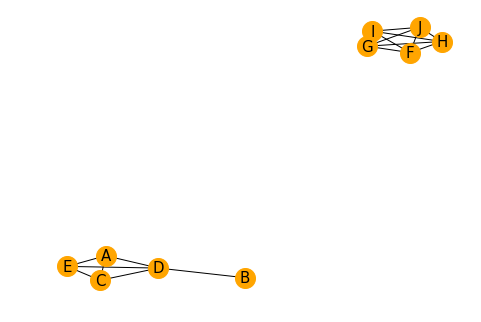

In [23]:
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

In [35]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from src.recommender.recommender import Recommender

recommender = Recommender(0)

Blob meal.csv downloaded to /home/oli/Repos/tuk.mensa-kl-conv-ai/meal_tmp.csv.


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


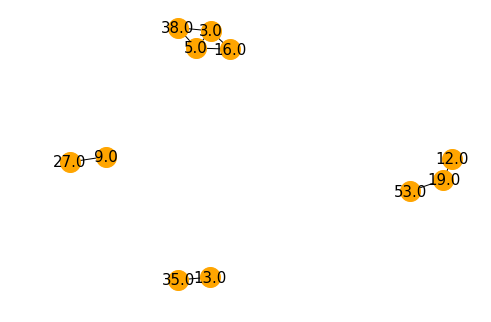

In [74]:
corr = recommender.user_similarity['correlation']
# del corr.index.name
# del corr.columns.name
corr
 
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

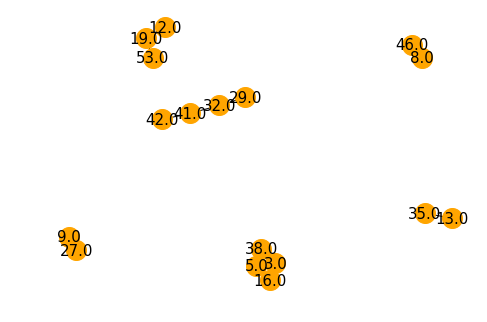

In [77]:
mat = recommender.user_similarity['cosine']
 
# Transform it in a links data frame (3 columns only):
links = mat.stack().reset_index()
links.columns = ['var1', 'var2','value']

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

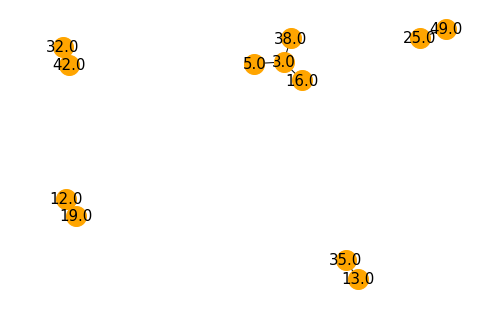

In [79]:
mat = recommender.user_similarity['dice']
 
# Transform it in a links data frame (3 columns only):
links = mat.stack().reset_index()
links.columns = ['var1', 'var2','value']

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

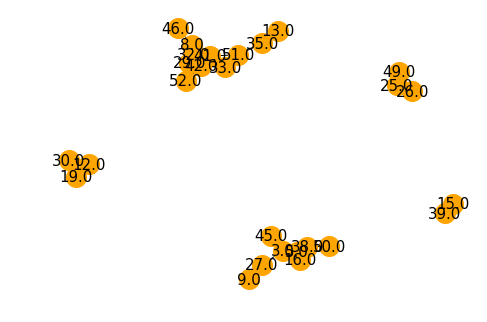

In [87]:
mat = recommender.user_similarity['jaccard']
 
# Transform it in a links data frame (3 columns only):
links = mat.stack().reset_index()
links.columns = ['var1', 'var2','value']

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.2) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)